In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
from config import weather_api_key
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-72.5662533848144, -76.94331667978855),
 (53.01221279775447, -60.0681660682549),
 (44.65360618567021, 84.45850522472796),
 (35.524136674848506, 26.680469948281427),
 (9.776239761332405, -113.35995281666652),
 (79.67524223991009, 30.903859527936078),
 (61.68822869092122, -112.956316024204),
 (-54.45059581277616, 41.550274448063135),
 (20.195510339519586, 136.97507210525146),
 (57.20864440085526, -148.66945333888646),
 (28.98556859209286, 12.033151037609287),
 (34.039214942414645, 137.57652307236293),
 (-43.193785134654824, 104.80947657330705),
 (31.462470136805962, -68.42091079940884),
 (-81.69972614983999, 123.30063231335271),
 (23.436116777522855, -110.68805306719592),
 (39.72177455476398, 123.29304605816901),
 (-23.460728239256454, -168.53155778770818),
 (-34.29425942011178, 166.50610754965533),
 (-79.32444693311501, -123.29173116352862),
 (-34.32443836183064, -87.46465708999087),
 (-43.86079154345069, -40.2547892912165),
 (-6.325447768577703, 96.53588980220235),
 (34.1863165230104

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | saint-augustin
Processing Record 3 of Set 1 | kuytun
Processing Record 4 of Set 1 | palaikastron
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | berlevag
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | nishihara
Processing Record 10 of Set 1 | homer
Processing Record 11 of Set 1 | awbari
Processing Record 12 of Set 1 | kosai
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | todos santos
Processing Record 17 of Set 1 | zhuanghe
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | chuy
Processing Record 23 of Set 1 | bengkulu
P

Processing Record 41 of Set 4 | fairbanks
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | kawalu
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | dali
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | araouane
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | bacuit
City not found. Skipping...
Processing Record 1 of Set 5 | boa vista
Processing Record 2 of Set 5 | sagua la grande
Processing Record 3 of Set 5 | forest hills
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | yanam
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | ulaangom
Processing Record 10 of Set 5 | lons
Processing Record 11 of Set 5 | qaqortoq
Processing Record 12 of Set 5 | rorvik
Processing Record 13 of Set 5 | montepuez
Processing Re

Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | pevek
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | soltsy
Processing Record 30 of Set 8 | lidzbark warminski
Processing Record 31 of Set 8 | nyurba
Processing Record 32 of Set 8 | atar
Processing Record 33 of Set 8 | kismayo
Processing Record 34 of Set 8 | wawa
Processing Record 35 of Set 8 | buala
Processing Record 36 of Set 8 | sendenhorst
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | hamadan
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | kazachinskoye
Processing Record 41 of Set 8 | makakilo city
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | mbalmayo
Processing Record 44 of Set 8 | belyy yar
Processing Record 45 of Set 8 | bitung
Processing Record 46 of Set 8 | dawlatabad
Processing Record 47 of Set 8 | nederland
Processing Record 48 of Set 8 | daman
Processing Record 49 of Set 8 | grindavik


Processing Record 13 of Set 12 | ilanskiy
Processing Record 14 of Set 12 | christchurch
Processing Record 15 of Set 12 | luancheng
Processing Record 16 of Set 12 | suraabad
Processing Record 17 of Set 12 | areia branca
Processing Record 18 of Set 12 | sao domingos
Processing Record 19 of Set 12 | safaga
Processing Record 20 of Set 12 | addis abeba
Processing Record 21 of Set 12 | seidu
Processing Record 22 of Set 12 | maceio
Processing Record 23 of Set 12 | mayskiy
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | wanxian
Processing Record 27 of Set 12 | ossora
Processing Record 28 of Set 12 | aktash
Processing Record 29 of Set 12 | lobez
Processing Record 30 of Set 12 | mongo
Processing Record 31 of Set 12 | semirom
Processing Record 32 of Set 12 | hong gai
Processing Record 33 of Set 12 | riviere-au-renard
Processing Record 34 of Set 12 | port augusta
Processing Record 35 of Set 12 | rocha
Processing Record 36 o

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.86,81,0,4.61,AR,2021-09-07 03:21:45
1,Saint-Augustin,51.2260,-58.6502,56.34,83,100,9.51,CA,2021-09-07 03:22:12
2,Kuytun,54.3419,101.5036,40.73,92,100,4.99,RU,2021-09-07 03:22:12
3,Palaikastron,35.2000,26.2500,73.94,73,3,23.47,GR,2021-09-07 03:22:12
4,San Patricio,28.0170,-97.5169,86.09,62,8,9.95,US,2021-09-07 03:22:13
5,Berlevag,70.8578,29.0864,32.00,72,21,4.59,NO,2021-09-07 03:22:13
6,Yellowknife,62.4560,-114.3525,55.92,88,20,6.91,CA,2021-09-07 03:22:01
7,East London,-33.0153,27.9116,52.74,93,75,5.75,ZA,2021-09-07 03:22:13
8,Nishihara,26.1842,127.7558,87.46,70,40,6.91,JP,2021-09-07 03:22:14
9,Homer,59.6425,-151.5483,59.07,64,1,9.22,US,2021-09-07 03:22:14


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

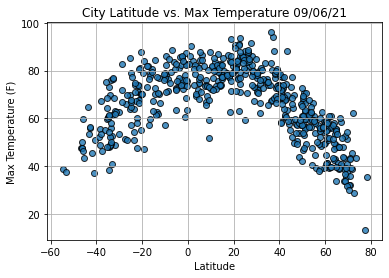

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

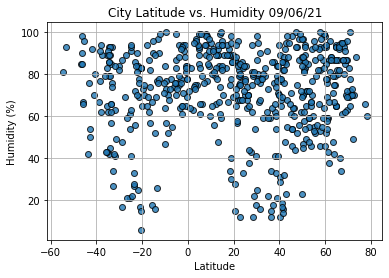

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

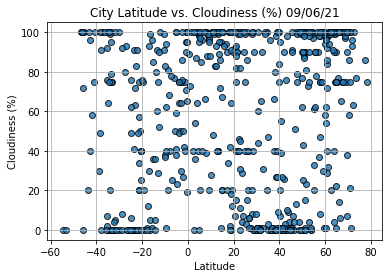

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

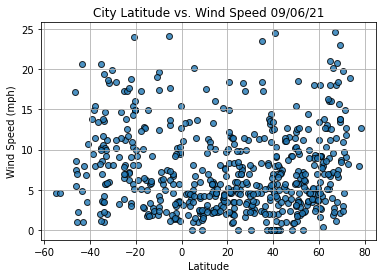

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

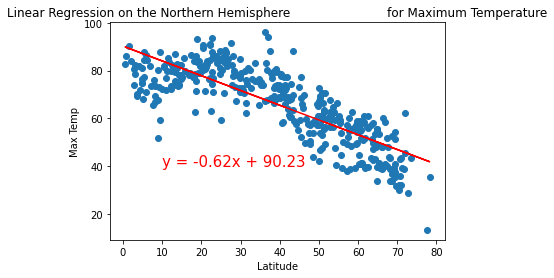

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

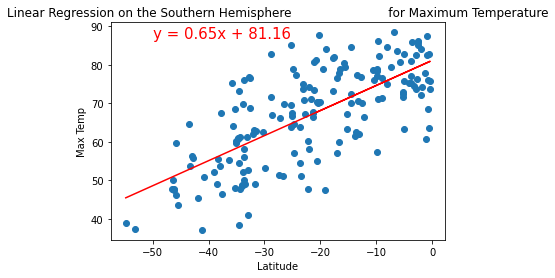

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,87))

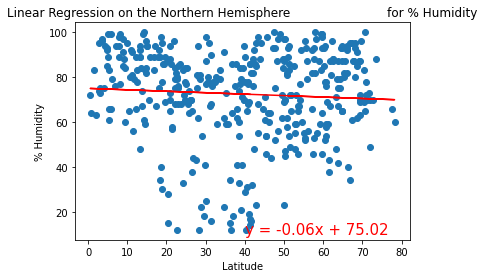

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

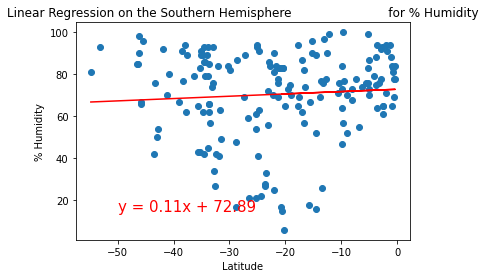

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

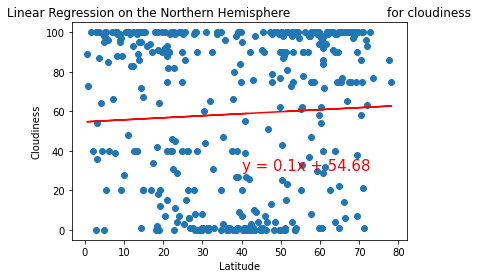

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'Cloudiness',(40,30))

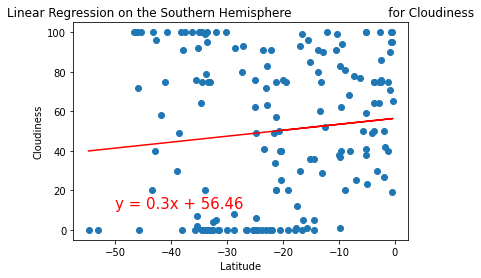

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,11))

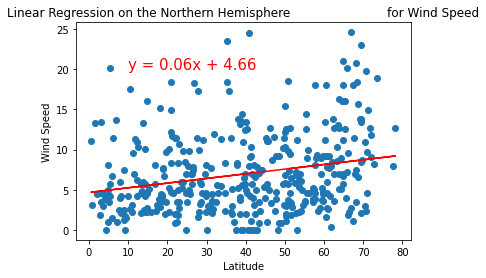

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,20))

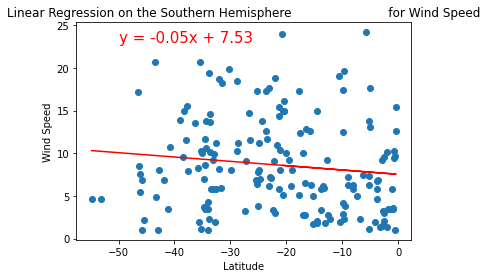

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,23))